In [1]:
import os
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
#path = './turtleshelltechnologies-movement-161ea93be92a/test_data'
X = pd.concat([pd.read_csv(f'E:/Downloads/turtleshelltechnologies1/turtleshelltechnologies-movement-161ea93be92a/test_data/{f}',header=None) for f in os.listdir(path) if f.endswith('.csv')],axis=0)


In [7]:
X.columns=['refer']

In [8]:
X.shape

(299970, 1)

In [9]:

difference = pd.DataFrame(X.diff().fillna(X))
difference.columns=['move']# difference of previous value and current value

In [10]:
X1=pd.concat([X,difference], axis=1)

In [11]:
X1.head(10)

,refer,move
0,14,14.0
1,12,-2.0
2,15,3.0
3,14,-1.0
4,13,-1.0
5,13,0.0
6,12,-1.0
7,12,0.0
8,12,0.0
9,12,0.0


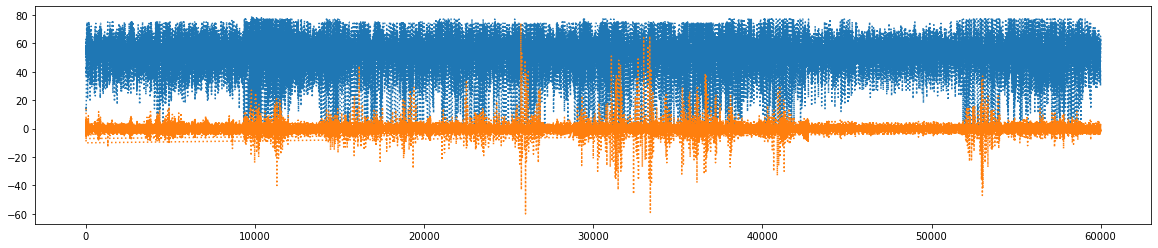

In [12]:
f = plt.figure()
f.set_figwidth(20)
plt.plot(X1.refer, linestyle = 'dotted')
plt.plot(X1.move, linestyle = 'dotted')
plt.show()

In [13]:
# grouping on mean the 250 rows for calculating a minute as 60000 rows equivalent to 4 minutes
x_new = X1.groupby(np.arange(len(X))//250).mean()

In [14]:
x_new.shape#Total of 20 minutes in 5 files each of 4 minutes of data.

(1200, 2)

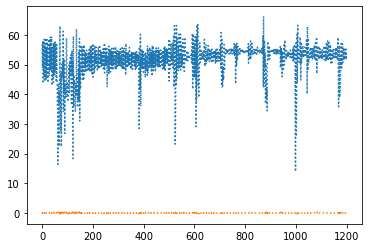

In [15]:
plt.plot(x_new.refer, linestyle = 'dotted')
plt.plot(x_new.move, linestyle = 'dotted')
plt.show()

In [16]:
import sys
np.set_printoptions(threshold=sys.maxsize)

# Using DBSCAN....

Number of clusters: 1
Outliers : 130


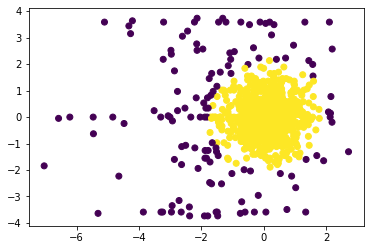

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
x_new1 = StandardScaler().fit_transform(x_new)
y_pred = DBSCAN(eps=0.65, min_samples=60).fit_predict(x_new1)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(x_new1[:,0], x_new1[:,1], c=y_pred)    


##......Yellow shows no movement, the outliers shows movement......

In [18]:
import numpy as np
import array
a = np.array(y_pred)
np.where(a == -1)[0]##The seconds sleep is disturbed and movement observed....

array([   0,   11,   14,   34,   46,   47,   60,   61,   62,   63,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   75,   76,   77,
         79,   84,   86,   89,   91,   92,   93,   94,   96,   97,   98,
         99,  102,  104,  107,  115,  116,  118,  119,  120,  121,  122,
        124,  125,  127,  128,  130,  131,  132,  133,  134,  135,  138,
        139,  140,  141,  142,  144,  145,  146,  147,  148,  149,  151,
        152,  256,  257,  381,  382,  386,  387,  388,  389,  407,  519,
        520,  521,  524,  525,  528,  529,  558,  593,  598,  599,  605,
        606,  608,  609,  613,  617,  705,  707,  710,  711,  712,  714,
        762,  871,  872,  880,  882,  883,  884,  885,  886,  940,  941,
        945,  997,  998, 1001, 1002, 1004, 1005, 1006, 1007, 1044, 1045,
       1083, 1167, 1168, 1169, 1170, 1172, 1173, 1174, 1176], dtype=int32)

# Using KMeans....

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=90)
kmeans.fit(x_new1)
y_kmeans = kmeans.predict(x_new1)

Outliers : 130


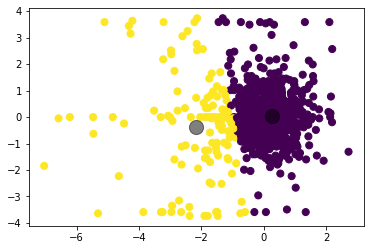

In [20]:
plt.scatter(x_new1[:, 0], x_new1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
print('Outliers :', len(y_pred[np.where(y_kmeans == 1)]))

In [23]:
y_kmeans
b = np.array(y_kmeans)
np.where(b !=0)[0]

array([   4,    9,   12,   15,   18,   23,   28,   39,   42,   44,   49,
         55,   56,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   71,   72,   73,   75,   76,   78,   84,   86,
         89,   90,   91,   92,   93,   94,   98,   99,  100,  101,  102,
        103,  104,  107,  108,  110,  115,  116,  119,  121,  124,  125,
        127,  129,  130,  131,  132,  133,  134,  137,  138,  139,  140,
        141,  142,  144,  146,  148,  151,  158,  161,  164,  197,  200,
        256,  329,  382,  386,  388,  389,  406,  433,  500,  519,  520,
        524,  525,  526,  528,  530,  593,  596,  605,  606,  608,  615,
        617,  707,  710,  711,  713,  715,  762,  763,  871,  873,  874,
        880,  882,  884,  885,  886,  997,  998, 1001, 1002, 1005, 1019,
       1044, 1082, 1167, 1168, 1169, 1172, 1173, 1174, 1175], dtype=int32)